<a href="https://colab.research.google.com/github/Braafisch/KI-Aufgaben/blob/main/aufgabe_8/aufgabe_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Berlin was geht ab!")

Berlin was geht ab!


# Exercise: k-armed bandits
We use the 10-armed bandit testbed from Sutton & Barto 2020



*   The true value q*
(a) of each of the ten actions a is selected according to a normal distribution 
with mean 0 and unit variance
*    The actual rewards are selected according to a mean q*
(a), and are also unit-variance normal distributed, as suggested by these gray distributions. 
* Action-value estimates using the sample-average technique (with an initial estimate of 0)


> 1.   Run 1000 time steps for the generated 10-armed bandit problems and action-value 
algorithms
2.    Use 2000 randomly generated 10-armed bandit problems of this type.
Run 1000 time steps for each of the 2000 randomly generated 10-armed bandit problems 
and action-value algorithms and average the results for each time step.









In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

from numpy.random import random
from numpy.random import randint
from numpy.random import normal

In [48]:
def sample_average(alpha,R,Q):
  return alpha*(R-Q)

def action_selection(Q,epsilon=0):
      p = random()
      if p < epsilon:
        return randint(0,len(Q))
      else:
        ids = np.argwhere(Q[:,0] == np.amax(Q))
        return ids[randint(0,ids.shape[0])] if ids.shape[0] > 1 else ids[0]

def action_selection_UCB(Q,t,Nt,c=1):
  Qtemp = np.copy(Q)
  for a in range(10):
    if Nt[a] == 0:
      return a
    if t > 0:
      Qtemp[a] += c*np.sqrt(np.log(t)/Nt[a])
    ids = np.argwhere(Qtemp[:,0] == np.amax(Qtemp))
    if ids.shape[0] > 1:
      return ids[randint(0,ids.shape[0])]
    else:
      return ids[0]

def run(nr_runs,nr_steps,epsilon=0,new_rewards=False,alpha=None,UCB=False):
  R_run = np.zeros((nr_runs,nr_steps))
  for run in tqdm(range(nr_runs)):
    Rewards = np.random.normal(0,1,[10,1])
    Q = np.zeros((10,1),dtype=float) 
    N = np.zeros((10,1),dtype=int)

    for step in range(nr_steps):
      if step == 1000 and new_rewards:
        Rewards[randint(0,10,5)] = normal(0,1,(5,1))
      A = action_selection_UCB(Q,step,N) if UCB else action_selection(Q,epsilon=epsilon)
      R = normal(Rewards[A],1,size=None)
      N[A] += 1
      Q[A] += sample_average(alpha, R, Q[A]) if alpha is not None else sample_average(1/N[A], R, Q[A])
      R_run[run,step] = R

  return R_run

Run 1000 time steps for the generated 10-armed bandit problems and action-value algorithms

In [10]:
data = run(1,1000)
np.savez('result_task_0_aufgabe_1.npz', Result=data)

  0%|          | 0/1 [00:00<?, ?it/s]

Use 2000 randomly generated 10-armed bandit problems of this type. Run 1000 time steps for each of the 2000 randomly generated 10-armed bandit problems and action-value algorithms and average the results for each time step.

In [26]:
data = run(2000,1000)
np.savez('result_task_0_aufgabe_2.npz',Results = data)

  0%|          | 0/2000 [00:00<?, ?it/s]

Text(0, 0.5, 'optimal_action')

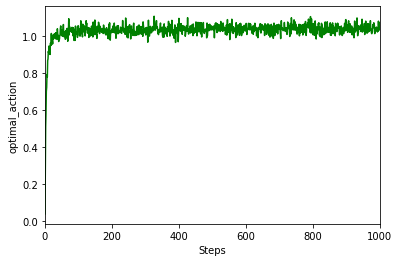

In [25]:
x = range(1000)
y = np.mean(data,axis=0)
plt.plot(x,y,color='g')
plt.xlim(0,1000)
plt.xlabel("Steps")
plt.ylabel("optimal_action")

### Task 2
Write a program that can reproduce the results of Sutton and Barto for the greedy and the ε-
greedy algorithm ( ε = 0.1 and ε=0.01) as shown in the lecture.

In [47]:
data = run(2000,1000,0.1)
np.savez('result_task_2_epsilon_10.npz',Results = data)
data = run(2000,1000,0.01)
np.savez('result_task_2_epsilon_1.npz',Results = data)

  0%|          | 0/2000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

### Task 3
Change the maximum number of steps from 1000 to 2000.
Do the ε-greedy algorithms ( ε = 0.1 and ε=0.01) converge?

In [33]:
data = run(2000,2000)
np.savez('result_task_3_epsilon_0.npz',Results = data)
data = run(2000,2000,0.1)
np.savez('result_task_3_epsilon_10.npz',Results = data)
data = run(2000,2000,0.01)
np.savez('result_task_3_epsilon_1.npz',Results = data)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

### Task 4
Change the true value q*(a) of 5 randomly selected actions (out of the 10 actions) at time step
1000 (i.e. now we have constructed a non-stationary problem). Run for 2000 time steps.
Can you explain the behavior of the greedy and ε-greedy algorithms?

In [37]:
data = run(2000,2000,new_rewards=True)
np.savez('result_task_4_epsilon_10.npz',Results = data)
data = run(2000,2000,0.1,True)
np.savez('result_task_4_epsilon_10.npz',Results = data)
data = run(2000,2000,0.01,True)
np.savez('result_task_4_epsilon_1.npz',Results = data)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

### Task 5
Add the results of a weighted average method with α = 0.9 and ε-greedy (ε = 0.01) action
selection to your final plot. Change the true value q*(a) as in task 4. What do you observe, especially comparing the sample average to the weighted average method of ε-greedy (ε = 0.01) action
selection? Can you explain the behavior?

In [39]:
data = run(2000,2000,0.1,True,0.9)
np.savez('result_task_5_epsilon_0.npz',Results = data)
data = run(2000,2000,0.1,True,0.9)
np.savez('result_task_5_epsilon_10.npz',Results = data)
data = run(2000,2000,0.01,True,0.9)
np.savez('result_task_5_epsilon_1.npz',Results = data)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

### Task 6 
Add Upper-confident-bound action selection (UCB) c = 1 to your final plot. Change the true
value q*(a) as in task 4.

In [49]:
data = run(2000,2000,0.1,True,UCB=True)
np.savez('result_task_6_epsilon_0.npz',Results = data)
data = run(2000,2000,0.1,True,UCB=True)
np.savez('result_task_6_epsilon_10.npz',Results = data)
data = run(2000,2000,0.01,True,UCB=True)
np.savez('result_task_6_epsilon_1.npz',Results = data)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]